# Lab 1:  Numpy, Scipy and Matplotlib -  high-performance vector operations


#### CSC 180  Intelligent Systems (Spring 2020)

#### Dr. Haiquan Chen, California State University, Sacramento

<img src="https://cdn-images-1.medium.com/fit/t/1600/480/1*Y2v3PrF1rUQRUHwOcXJznA.png" width="600">


# 1. Numpy

The `numpy` package (module) is used in almost all numerical computation using Python. It is a package that provide high-performance vector, matrix and higher-dimensional data structures for Python. It is implemented in C and Fortran so when calculations are vectorized (formulated with vectors and matrices), performance is very good. 

To use `numpy` first import the module:

In [1]:
import numpy as np  # np is the most common import name for numpy

In the `numpy` package the terminology used for vectors, matrices and higher-dimensional data sets is *array*. 



## Creating `numpy` arrays (vectors or matrices)

There are a number of ways to initialize new numpy arrays, for example from

* a Python list or tuples
* using functions that are dedicated to generating numpy arrays, such as `arange`, `linspace`, etc.
* reading data from files

### From lists

For example, to create new vector and matrix arrays from Python lists we can use the `numpy.array` function.

In [2]:
# a vector: the argument to the array function is a Python list
v = np.array([1, 2, 3, 4])
v

array([1, 2, 3, 4])

In [3]:
# a matrix (or better a 2d array): the argument to the array function is a nested Python list
M = np.array([[1, 2], [3, 4]])
M

array([[1, 2],
       [3, 4]])

The `v` and `M` objects are both of the type `ndarray` that the `numpy` module provides.

In [4]:
type(v), type(M)

(numpy.ndarray, numpy.ndarray)

The difference between the `v` and `M` arrays is only their shapes. We can get information about the shape of an array by using the `ndarray.shape` property.

In [5]:
v.shape

(4,)

In [6]:
M.shape

(2, 2)

The number of elements in the array is available through the `ndarray.size` property:

In [7]:
v.size

4

In [8]:
M.size  # be careful matlab size is shape with Numpy

4

***So far the `numpy.ndarray` looks much like a Python list. 

### Why not simply use Python lists for computations instead of creating a new array type?

There are several reasons:

* Numpy arrays are ***memory efficient*** and run ***much faster*** than Python lists in order to support ***big data***.
* Python lists DO NOT support ***mathematical functions*** such as matrix and dot multiplications, etc. Implementating such functions for Python lists would be very inefficient. 
* Python lists are very general. They can contain any kind of object. * Numpy arrays are  **homogeneous**. The type of the elements is determined when array is created.***


Using the `dtype` (data type) property of an `ndarray`, we can see what type each element of an array has:

In [9]:
M.dtype

dtype('int32')

We get an error if we try to assign a value of the wrong type to an element in a numpy array:

In [10]:
M[0, 0] = "hello"

ValueError: invalid literal for int() with base 10: 'hello'

If we want, we can ***explicitly define the type of the array data*** when we create it, using the `dtype` keyword argument: 

In [11]:
M = np.array([[1, 2], [3, 4]], dtype='float32')
M

array([[1., 2.],
       [3., 4.]], dtype=float32)

Common type that can be used with `dtype` are: `int`, `float`, `complex`, `bool`, `object`, etc.

We can also explicitly define the bit size of the data types, for example: `int64`, `int16`, `float128`, `complex128`.

### Using functions to generate arrays

For larger arrays it is inpractical to initialize the data manually, using explicit python lists. Instead we can use one of the many functions in `numpy` that generates arrays of different forms. Some of the more common are:

#### arange

In [12]:
# create a range

x = np.arange(0, 10, 1) # arguments: start, stop, step
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [13]:
x = np.arange(-1, 1, 0.1)
x

array([-1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01, -2.22044605e-16,  1.00000000e-01,
        2.00000000e-01,  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,
        6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01])

#### linspace and logspace

In [14]:
# using linspace, both end points ARE included
np.linspace(0, 10, 25)

array([ 0.        ,  0.41666667,  0.83333333,  1.25      ,  1.66666667,
        2.08333333,  2.5       ,  2.91666667,  3.33333333,  3.75      ,
        4.16666667,  4.58333333,  5.        ,  5.41666667,  5.83333333,
        6.25      ,  6.66666667,  7.08333333,  7.5       ,  7.91666667,
        8.33333333,  8.75      ,  9.16666667,  9.58333333, 10.        ])

In [15]:
np.logspace(0, 10, 10, base=10)

array([1.00000000e+00, 1.29154967e+01, 1.66810054e+02, 2.15443469e+03,
       2.78255940e+04, 3.59381366e+05, 4.64158883e+06, 5.99484250e+07,
       7.74263683e+08, 1.00000000e+10])

## Manipulating arrays

### Indexing

We can index elements in an array using the square bracket and indices:

In [16]:
v = np.array([1, 2, 3, 4])

# v is a vector, and has only one dimension, taking one index
v[0]

1

In [18]:
M = np.array([[1, 2], [3, 4]])

# M is a matrix, or a 2 dimensional array, taking two indices 
M[1, 1]

4

In [19]:
M

array([[1, 2],
       [3, 4]])

In [20]:
M[1, :] # row 1

array([3, 4])

In [21]:
M[:, 1] # column 1

array([2, 4])

We can assign new values to elements in an array using indexing:

In [22]:
M[0, 0] = 10
M

array([[10,  2],
       [ 3,  4]])

In [21]:
# also works for rows and columns
M[0, :] = 0
M[:, 1] = -1

In [22]:
M

array([[ 0, -1],
       [ 3, -1]])

### Index slicing

Index slicing is the technical name for the syntax `M[start:end:step]` to extract part of an array:

In [23]:
A = np.array([1,2,3,4,5])
A

array([1, 2, 3, 4, 5])

In [24]:
A[1:3]

array([2, 3])

#### Array slices are *mutable*

If they are assigned a new value the original array from which the slice was extracted is modified:

In [25]:
A[1:3] = [-2, -3]

A

array([ 1, -2, -3,  4,  5])

We can omit any of the three parameters in `M[start:end:step]`:

In [26]:
A[::] # lower, upper, step all take the default values

array([ 1, -2, -3,  4,  5])

In [27]:
A[::2] # step is 2, lower and upper defaults to the beginning and end of the array

array([ 1, -3,  5])

In [28]:
A[:3] # first three elements

array([ 1, -2, -3])

In [29]:
A[3:] # elements from index 3

array([4, 5])

Negative indices counts from the end of the array (positive index from the begining):

In [31]:
A = np.array([1, 2, 3, 4, 5])

In [32]:
A[-1] # the last element in the array

5

In [33]:
A[-3:] # the last three elements

array([3, 4, 5])

### Index slicing works exactly the same way for multidimensional arrays:

You may also use an array or list as an index:

In [34]:
A = np.array([[n+m*10 for n in range(5)] for m in range(5)])

A   # a matrix

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [34]:
row_indices = [1, 2, 3]
A[row_indices,:]

array([[10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34]])

In [35]:
col_indices = [1, 2, -1] # remember, index -1 means the last element
A[:,col_indices]

array([[ 1,  2,  4],
       [11, 12, 14],
       [21, 22, 24],
       [31, 32, 34],
       [41, 42, 44]])

In [36]:
# a block from the original array
A[1:4, 1:4]

array([[11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

## Array-oriented programming

### Vectorizing code is the key to writing code when handling big data. That means that as much as possible, a program should be written in terms of matrix (vector) operations.

### Scalar-array operations

We can use the usual arithmetic operators to multiply, add, subtract, and divide arrays with scalar numbers.

In [35]:
v1 = np.arange(0, 5)
v1

array([0, 1, 2, 3, 4])

In [36]:
v1 * 2

array([0, 2, 4, 6, 8])

In [37]:
v1 + 2

array([2, 3, 4, 5, 6])

### Element-wise array-array operations

When we add, subtract, multiply and divide arrays with each other, the default behaviour is **element-wise** operations:

In [38]:
A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [39]:
A * A # element-wise multiplication

array([[   0,    1,    4,    9,   16],
       [ 100,  121,  144,  169,  196],
       [ 400,  441,  484,  529,  576],
       [ 900,  961, 1024, 1089, 1156],
       [1600, 1681, 1764, 1849, 1936]])

### Matrix algebra

What about matrix mutiplication? We can use the `dot` function

In [40]:
np.dot(A, A)

array([[ 300,  310,  320,  330,  340],
       [1300, 1360, 1420, 1480, 1540],
       [2300, 2410, 2520, 2630, 2740],
       [3300, 3460, 3620, 3780, 3940],
       [4300, 4510, 4720, 4930, 5140]])

### Basic data analysis using numpy

Often it is useful to store datasets in Numpy arrays (matrix). Numpy provides a number of functions to calculate statistics of datasets in arrays.

In [41]:
A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [42]:
np.shape(A)

(5, 5)

#### mean

In [43]:
np.mean(A[:, 3])

23.0

#### standard deviations and variance, min and max

In [44]:
np.std(A[:, 3]), np.var(A[:, 3])

(14.142135623730951, 200.0)

In [45]:
# lowest value
A[:, 3].min()

3

In [46]:
# highest value
A[:, 3].max()

43

#### sum, prod

In [47]:
# sum up all elements
np.sum(A[:, 3])

115

In [48]:
# product of all elements
np.prod(A[:, 3])

1272843

### Perform funcitons to entire matrix?

It is sometimes useful to apply the calculation to the entire array, and sometimes only on a row or column basis. Using the `axis` argument we can specify how these functions should behave: 

In [49]:
from numpy import random

m = random.rand(3, 3)
m

array([[0.91053408, 0.9040562 , 0.18833138],
       [0.99468701, 0.08082973, 0.04967686],
       [0.18455222, 0.85463731, 0.56495302]])

In [50]:
# global max
m.max()

0.9946870104199546

In [51]:
# max in each column
m.max(axis=0)

array([0.99468701, 0.9040562 , 0.56495302])

In [52]:
# max in each row
m.max(axis=1)

array([0.91053408, 0.99468701, 0.85463731])

Many other functions and methods in the `array` and `matrix` classes accept the same (optional) `axis` keyword argument.

## Reshaping arrays

The shape of an Numpy array can be modified without copying the underlaying data, which makes it a fast operation even for large arrays.

In [53]:
A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [54]:
n, m = A.shape
n, m     # equivalent to print(n, m)

(5, 5)

In [55]:
B = A.reshape((1, n*m))  
B

array([[ 0,  1,  2,  3,  4, 10, 11, 12, 13, 14, 20, 21, 22, 23, 24, 30,
        31, 32, 33, 34, 40, 41, 42, 43, 44]])

We can also use the function `flatten` to make a higher-dimensional array into a vector. But this function create a seperate copy of the underlying data.

In [56]:
B = A.flatten()  # because B's data is a seperate copy of A's,
B

array([ 0,  1,  2,  3,  4, 10, 11, 12, 13, 14, 20, 21, 22, 23, 24, 30, 31,
       32, 33, 34, 40, 41, 42, 43, 44])

## Type casting

Since Numpy arrays are *statically typed*, the type of an array does not change once created. But we can explicitly cast an array of some type to another using the `astype` functions. This always create a new array of new type:

In [57]:
M

array([[10,  2],
       [ 3,  4]])

In [58]:
M.dtype

dtype('int32')

In [59]:
M2 = M.astype('float64')

M2

array([[10.,  2.],
       [ 3.,  4.]])

In [60]:
M2.dtype

dtype('float64')

In [61]:
M3 = M.astype(bool)

M3

array([[ True,  True],
       [ True,  True]])

# 2. Scipy:  a library for scientific computing
#### It provides many user-friendly and efficient numerical routines such as stats,  numerical integration and optimization.

In [62]:
import numpy as np
import scipy.spatial.distance as sp_dist


x = np.random.randint(0, 2, size = 20)      # Return random integers from low (inclusive) to high (exclusive).
y = np.random.randint(0, 2, size = 20)

print (x)
print (y)
print (sp_dist.cosine(x,y))
print (sp_dist.euclidean(x,y))
print (sp_dist.jaccard(x,y))
print (sp_dist.hamming(x,y))

[0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 1 0]
[1 0 0 1 1 0 1 0 1 1 1 1 0 1 0 0 1 0 0 1]
0.8093074821508816
4.123105625617661
0.8947368421052632
0.85


In [2]:
from scipy.stats import linregress

a = [15, 12, 8, 8, 7, 7, 7, 6, 5, 3]
b = [10, 25, 17, 11, 13, 17, 20, 13, 9, 15]

linregress(a, b)

LinregressResult(slope=0.20833333333333331, intercept=13.375, rvalue=0.14499815458068518, pvalue=0.689401448116695, stderr=0.5026170462708364)

# 3. Matplotlib

####  (1) Use a magic command to enable figures in notebook!!!
%matplotlib inline    

####  (2) Import
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

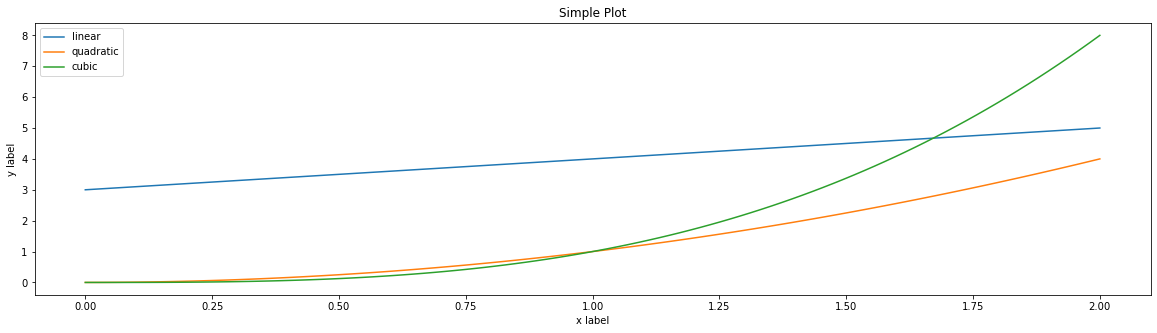

In [3]:
# A magic command to enable matplotlib figures in notebook!!!
%matplotlib inline 

# import
import matplotlib.pyplot as plt
import numpy as np 


# create an empty figure

fig = plt.figure()  # an empty figure 

plt.figure(figsize=(20,5))  # optional

x = np.linspace(0, 2, 100)

plt.plot(x, x+3, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')

plt.xlabel('x label')
plt.ylabel('y label')

plt.title("Simple Plot")

plt.legend()

plt.show()

### Generate random data

In [65]:
from numpy import random

In [66]:
# uniform random numbers in [0,1]
random.rand(5,5)

array([[0.56118608, 0.96720704, 0.03903479, 0.81669198, 0.20900078],
       [0.65204386, 0.06846624, 0.22723878, 0.77969805, 0.79572078],
       [0.91825879, 0.04060609, 0.21610323, 0.97305564, 0.44173127],
       [0.35596057, 0.72861772, 0.03573223, 0.77210142, 0.76944788],
       [0.15289743, 0.74808482, 0.36881136, 0.13898783, 0.2017211 ]])

In [67]:
# standard normal distributed random numbers
random.randn(5,5)

array([[-0.0392104 , -1.30165185, -0.38267094,  0.1003343 ,  0.15658771],
       [-2.14866875,  0.2251641 ,  1.98434381, -0.44189466,  0.64707194],
       [ 1.13982024, -1.11318011,  2.05177464,  1.10235516, -0.14052442],
       [ 0.51911713,  0.40605139,  0.57266201, -1.14301649, -0.15774944],
       [-0.72565232, -0.66517955, -1.63010971,  1.54765834, -1.30394378]])

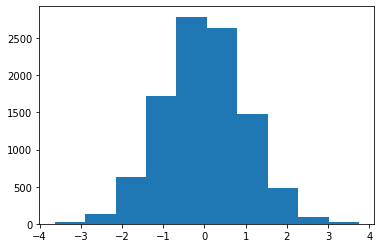

In [68]:
x = random.randn(10000)
plt.hist(x)
plt.show()

In [69]:
np.random.randint(0, 2, size=10)   # Return random integers from low (inclusive) to high (exclusive)

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0])

In [70]:
np.random.randint(0, 5, size=(2, 4))   # Return random integers from low (inclusive) to high (exclusive)

array([[4, 0, 1, 0],
       [3, 0, 1, 1]])